In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
#np.set_printoptions(threshold=np.nan)

In [2]:
def import_data(meas_num):
    '''import data'''
    path = "D:/eleerssen/Data/JJ_SQUID_gates_CD2"
    filename = "JJ_SQUID_gates_Cross2_SLSR_Ibias_Vcont_Gate"
    filepath = path+'/'+filename+'_'+str(meas_num)+'.dat'
    data = np.loadtxt(filepath)
 
    return data
 
def create_mesh(X,Y,D1,D2=[]):
    # extract sweep values for X
    Xv=np.unique(X)
  
    #Make sure all lines are complete
    no=len(X)%len(Xv)
    X=X[0:(len(X)-no)]
    Y=Y[0:(len(Y)-no)]
    D1=D1[0:(len(D1)-no)]
    if len(D2)!=0:
        D2=D2[0:(len(D2)-no)]
   
    # extract sweep values for Y
    Yv=np.unique(Y)
           
    #Create grids.
    Xm,Ym = np.meshgrid(Xv,Yv)
    D1m=D1.reshape(Xm.shape)
    if len(D2)!=0:
        D2m=D2.reshape(Xm.shape)
   
    # flip if the scan direction is positive to negative
    if Yv[0]==Y[0]:
        Yv=Yv
    elif len(D2)!=0:
        D1m=np.flipud(D1m)
        D2m=np.flipud(D2m)
    else:
        D1m=np.flipud(D1m)
   
    if len(D2)!=0:
        return Xm, Ym, D1m, D2m
    else:
        return Xm, Ym, D1m

In [3]:
def y_trace(Xm,Ym, D1m):
    yvalues = []
    values = []
    gradVal = []
    # get index of the zero of the trace
    zero_index = np.nonzero(Xm[0]==0)[0][0]
    
    #get the correct dataValues:
    for i, linecut in enumerate(D1m):
        yvalues.append(Ym[i,0])
        gradient = scipy.signal.savgol_filter(np.gradient(linecut),3,1)
        gradVal.append(gradient[zero_index])
        values.append(linecut[zero_index])

    return yvalues, values, gradient, gradVal

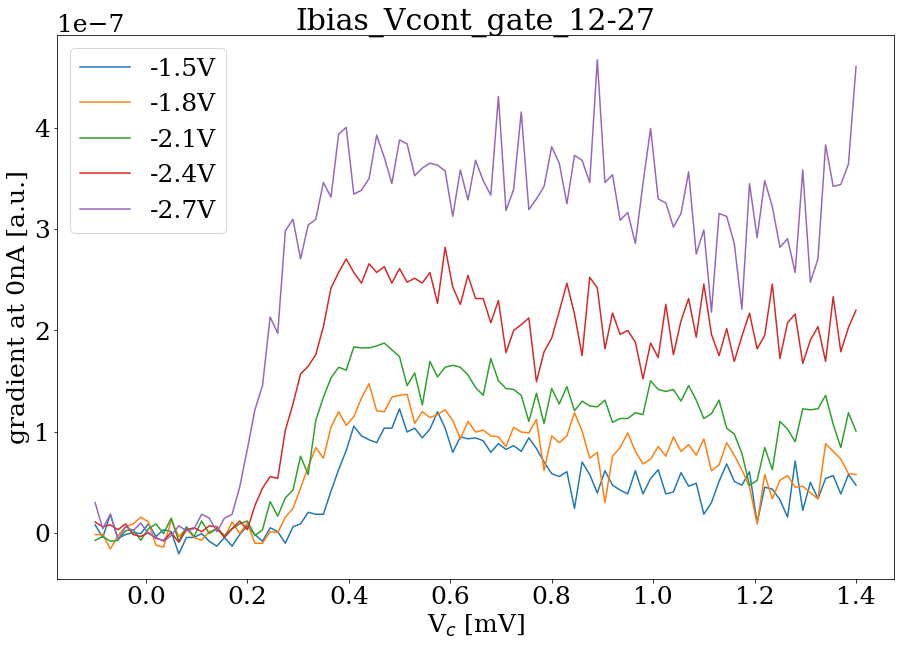

In [5]:
measNames = {12:"-1.5V",13:"-1.6V", 14:"-1.7V", 15:"-1.8V",16:"-1.9V", 17:"-2.0V", 18:"-2.1V",
             19:"-2.2V",20:"-2.3V", 21:"-2.4V",22:"-2.5V",23:"-2.6V", 24:"-2.7V", 25:"-2.8V",
            26:"-2.9V",27:"-3.0V"}

plt.rc('font', family='serif', size=25)
plt.figure(figsize=(15,10))

for i in range(12,27,3):
    xScaling = 1
    yScaling = 100
    
    data = import_data(i)
    Xm, Ym, D1m = create_mesh(data[:,0],data[:,1],data[:,3])

    yvalues, values, gradient, gradVal = y_trace(Xm,Ym/yScaling,D1m)
    
    plt.plot(yvalues,gradVal, label=measNames[i])
plt.title("Ibias_Vcont_gate_12-27")
plt.xlabel("V$_c$ [mV]")
plt.ylabel("gradient at 0nA [a.u.]")
plt.legend()
plt.show()